In [1]:
import numpy as np
from scipy.linalg import svd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

## Generate bivariate data with a few Gaussians of Different Means and Covariance

C:\Users\XiaX\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\XiaX\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
C:\Users\XiaX\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  if sys.path[0] == '':


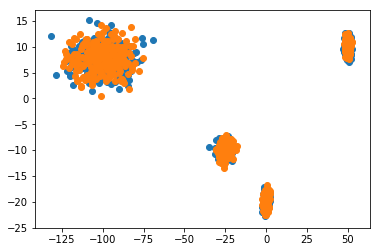

In [3]:
mean1 = [0, -20]
cov1 = [[1,0.5], [0,1]]
g1 = np.random.multivariate_normal(mean1, cov1, 250)
mean2 = [50, 10]
cov2 = [[1,0],[0,1]]
g2 = np.random.multivariate_normal(mean2, cov2, 250)
mean3 = [-100, 8]
cov3 = [[100,1.5],[1,6]]
g3 = np.random.multivariate_normal(mean3, cov3, 250)
mean4 = [-25, -10]
cov4 = [[5,0.5], [0,1]]
g4 = np.random.multivariate_normal(mean4, cov4, 250)
data = np.vstack((np.vstack((np.vstack((g1, g2)), g3)), g4))
plt.scatter(data[:,0], data[:,1])
plt.show()

## A Fully Vectorized Vanilla Kmean for Bivariate Data
#### Implemented as a baseline to compare with the tensor method

... 0 ... 117.38979371941267
... 1 ... 0.0
... 2 ... 0.0
... 3 ... 0.0
... 4 ... 0.0


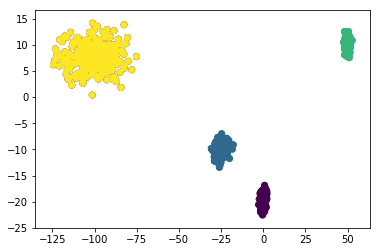

In [5]:
def bivariate_kmean(k, data, tolerance, iteration):
    means = (np.random.rand(k, 2) - 0.5)
    tol = float('inf')
    count = 0
    while (tol > tolerance and count < iteration) or count < 5:
        assignments = np.power(np.power(data - means[:,None], 2).sum(axis=2), 0.5).argmin(axis=0)
        mask = assignments == np.linspace(0,k-1,k)[:,None]
        new_means = (data * mask[...,None]).sum(axis=1) / (mask.sum(axis=1)[...,None] + 0.0001)
        tol = (((means - new_means)**2).sum())**.5
        means = new_means
        print ("...", count, "...", tol)
        count += 1
    return means, assignments

k = 4
means, assignments = bivariate_kmean(k, data, 0.000001, 100)

plt.scatter(data[:,0], data[:,1], c=assignments)
plt.show()

## Applying PCA to Data
#### Reduce data to one dimension and plot to visualize data projections

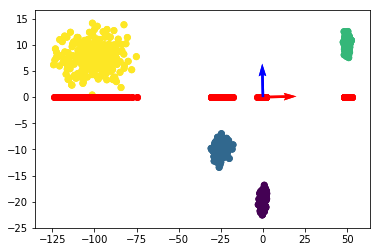

In [7]:
cov = np.cov(data.T)
w, v = np.linalg.eig(cov)
transformed_data = np.dot(data, v[0])

plt.scatter(data[:,0], data[:,1], c=assignments)
plt.scatter(transformed_data, [0]*data.shape[0], color='r')
plt.quiver([0,0], [0,0], v[:,0], v[:,1], color=['red','blue'], scale=10)
plt.show()

## Applying Tensor Decomposition
#### Instead of the covariance matrix, use the Square of Distance Matrix

In [86]:
distance_matrix = euclidean_distances(data, data)
distance_matrix = 1.0 / (distance_matrix + .1)
distance_matrix = distance_matrix / distance_matrix.sum(axis=0)
# val, vec = np.linalg.eig(distance_matrix)
U, s, VT = svd(distance_matrix)

In [87]:
print(np.abs(s[:10]))

[1.01911546 0.94851152 0.87794606 0.84511779 0.52792899 0.4612419
 0.4257893  0.41141799 0.38051381 0.34522063]


263
250
247
240


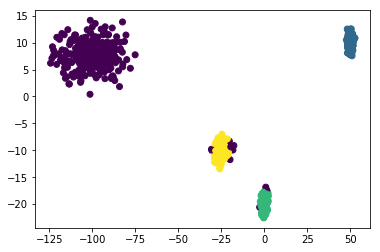

In [88]:
k = 4
cluster = np.argmax(VT[:k], axis=0)
for i in range(k):
    print((cluster == i).sum())
plt.scatter(data[:,0], data[:,1], c=cluster)
plt.show()

In [89]:
distance_matrix

array([[0.0371545 , 0.00307736, 0.00303794, ..., 0.00035683, 0.00026445,
        0.00020625],
       [0.00181933, 0.06284601, 0.00312186, ..., 0.00036543, 0.00026792,
        0.00020959],
       [0.00252695, 0.00439234, 0.0446678 , ..., 0.00037313, 0.00027469,
        0.00021544],
       ...,
       [0.0001312 , 0.00022726, 0.00016493, ..., 0.10105472, 0.00164463,
        0.00149068],
       [0.0001219 , 0.0002089 , 0.00015223, ..., 0.00206202, 0.08059938,
        0.00154715],
       [0.00013742, 0.00023621, 0.00017257, ..., 0.00270145, 0.00223625,
        0.05576264]])

In [36]:
a = [[1,2],[3,4],[2,4],[6,8]]
d = 1.0/(euclidean_distances(a, a)+.1)
di = d.sum(axis=0)
print (d)
print()
print (di)
print()
print (d/(di.T))
print()
print (d/di)


[[10.          0.34148024  0.42806973  0.12641826]
 [ 0.34148024 10.          0.90909091  0.19607843]
 [ 0.42806973  0.90909091 10.          0.17370598]
 [ 0.12641826  0.19607843  0.17370598 10.        ]]

[10.89596824 11.44664958 11.51086662 10.49620267]

[[0.91777066 0.02983233 0.03718832 0.01204419]
 [0.03134005 0.87361808 0.07897676 0.01868089]
 [0.03928698 0.07941983 0.86874432 0.01654941]
 [0.0116023  0.01712977 0.01509061 0.95272551]]

[[0.91777066 0.02983233 0.03718832 0.01204419]
 [0.03134005 0.87361808 0.07897676 0.01868089]
 [0.03928698 0.07941983 0.86874432 0.01654941]
 [0.0116023  0.01712977 0.01509061 0.95272551]]
